What are you trying to perform: 
 1. Similarity Between two users 2. Similarity Between two Movie
 3. Top similar users to target user 
 4.Top similar movies to target movie 5.Recommend Movies to user
 6. View Analysis 0. Quit  1
Enter Ids. Separated with a comma fyfi


please Check and try again retry


Enter Ids. Separated with a comma 100


please Check and try again retry


Enter Ids. Separated with a comma 100,200
What similarity metric would you like to use: 
 1. Eucledean Distance 2. Manhattan Distance
 3. Jaccard Similarity 4. Cosine Similarity
 5. Pearson Similarity  4


Similarity score between 100 and 200 is: 0.9501225619626733


What are you trying to perform: 
 1. Similarity Between two users 2. Similarity Between two Movie
 3. Top similar users to target user 
 4.Top similar movies to target movie 5.Recommend Movies to user
 6. View Analysis 0. Quit  3
Enter the target ID:  100
Enter the amount of top simliar items you want to return 5


{122: 1.0, 167: 1.0, 225: 1.0, 290: 1.0, 72: 1.0}


What are you trying to perform: 
 1. Similarity Between two users 2. Similarity Between two Movie
 3. Top similar users to target user 
 4.Top similar movies to target movie 5.Recommend Movies to user
 6. View Analysis 0. Quit  4
Enter the target ID:  120
Enter the amount of top simliar items you want to return 7


{'Sting, The (1973)': 1.0, 'Grosse Pointe Blank (1997)': 1.0, 'Some Like It Hot (1959)': 1.0, 'Carpool (1996)': 1.0, 'Twin Town (1997)': 1.0, 'Mask, The (1994)': 0.816496580927726, 'Serial Mom (1994)': 0.816496580927726}


What are you trying to perform: 
 1. Similarity Between two users 2. Similarity Between two Movie
 3. Top similar users to target user 
 4.Top similar movies to target movie 5.Recommend Movies to user
 6. View Analysis 0. Quit  5
Enter the target ID:  100
Enter the amount of top simliar items you want to return 7


{'Reality Bites (1994)': 1.0, 'Sirens (1994)': 1.0, 'Adventures of Priscilla, Queen of the Desert, The (1994)': 1.0, 'To Die For (1995)': 1.0, 'Paper, The (1994)': 1.0, 'Silence of the Lambs, The (1991)': 1.0, 'Ransom (1996)': 1.0}


What are you trying to perform: 
 1. Similarity Between two users 2. Similarity Between two Movie
 3. Top similar users to target user 
 4.Top similar movies to target movie 5.Recommend Movies to user
 6. View Analysis 0. Quit  6
Enter the target ID e.g 200:  200


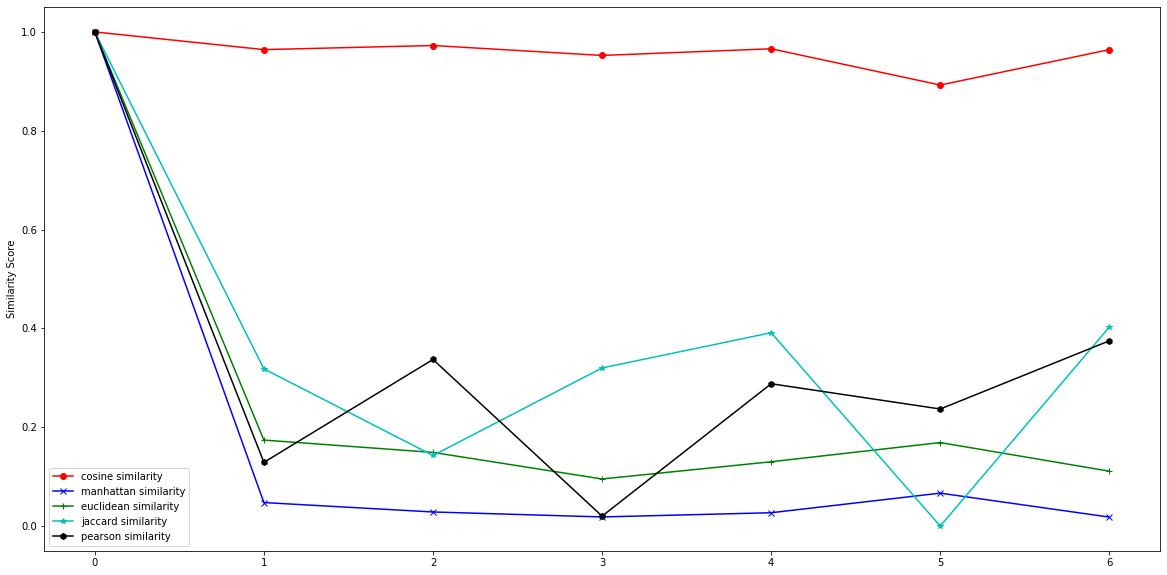

In [ ]:
import similarity_module
import load_dataset_module
import matplotlib.pyplot as plt

%matplotlib inline

def SimilarityMenu(selection, targetUser = 0, comparingUser = 0, user_preference = {}, movie_genre_watchers = {}, count = 0):
    # create an object for the similarity class 
    similarityMetric = similarity_module.SimilarityMetrics(False)
    
    #create a dictionary to define all the functions and map them to integers displayed on the menu
    switcher = {
        1: similarityMetric.euclidean_similarity,
        2: similarityMetric.manhattan_similarity,
        3: similarityMetric.jaccard_similarity,
        4: similarityMetric.cosine_similarity,
        5: similarityMetric.pearson_similarity,
        6: similarityMetric.Movie_Similarity,
        7: similarityMetric.TopUsersSimilarToTarget,
        8: similarityMetric.TopMoviesSimilarToTarget,
        9: similarityMetric.GetRecommendedMovies
    }
    function = switcher.get(selection, "Invalid input")
    
    if selection in [1,2,3,4,5]:
        return function(targetUser, comparingUser)
    if selection == 6 :
        return function(targetUser, comparingUser,similarityMetric.movie_cosine_similarity)
    if selection == 7 :
        return function(user_preference, targetUser, similarityMetric.cosine_similarity, count)
    if selection == 8 :
        return function(movie_genre_watchers, targetUser, similarityMetric.movie_cosine_similarity, count)
    if selection == 9 :
        return function(targetUser, user_preference, movie_genre_watchers, count)
        
    

def main():
    # create a loader object and load dictrionaries from data file
    loader = load_dataset_module.loadDatasets()
    user_preference = loader.loadUserPreferenceData()
    movie_genre_watchers = loader.loadMovieAndWatchers()
    
    app_running = True
    main_menu_selection = 0
    while app_running:
        try:
            # print the main menu options
            main_menu_selection = int(input("What are you trying to perform: \n 1. Similarity Between two users 2. Similarity Between two Movie\n 3. Top similar users to target user \n 4.Top similar movies to target movie 5.Recommend Movies to user\n 6. View Analysis 0. Quit "))
            # validate the users input
            if main_menu_selection not in [1,2,3,4,5,6,0]:
                raise Exception()
        except:
            print("Enter a valid input i.e 1,2 or 0")
            continue
            
        # if the selection is 0 then quit the application
        if(main_menu_selection == 0):
            break
        
        if main_menu_selection == 1 or main_menu_selection == 2:
            user_similarity_subMenu = True
            while user_similarity_subMenu:
                itemOne,itemTwo, similarity_selection = 0,0,0
                try:
                    # request for ids to be used for similarity and convert them to integer
                    (id_One, id_two) = [int(Id) for Id in input("Enter Ids. Separated with a comma").split(',')]
                    
                    #check if the main menu selection is for user similarity
                    if main_menu_selection == 1 :
                        # confirm that the id's exist in the dictionary
                        if any(user.userId == id_One for user in user_preference) and any(user.userId == id_two for user in user_preference):
                            #create object for user_one and user_two if the ids exist
                            itemOne = loader.GetUser(id_One,user_preference)
                            itemTwo = loader.GetUser(id_two,user_preference)
                            similarity_selection = int(input("What similarity metric would you like to use: \n 1. Eucledean Distance 2. Manhattan Distance\n 3. Jaccard Similarity 4. Cosine Similarity\n 5. Pearson Similarity "))
                        else:
                            print("Id noes not exist")
                            raise Exception()
                    #check if the main menu selection is for movie similarity
                    if main_menu_selection == 2 :
                        # confirm that the id's exist in the dictionary
                        if id_One in loader.movies.keys() and id_two in loader.movies.keys():
                            #load the movies if the ids exist
                            itemOne = loader.GetMovie(loader.GetMovieTitle(id_One), movie_genre_watchers)
                            itemTwo = loader.GetMovie(loader.GetMovieTitle(id_two), movie_genre_watchers)
                            similarity_selection = 6
                        else:
                            print("Id noes not exist")
                            raise Exception()
                except:
                    print("please Check and try again retry")
                    continue
                # pass arguements to similarity function
                similarityScore = SimilarityMenu(similarity_selection, itemOne, itemTwo, user_preference, movie_genre_watchers, 0)
                print("Similarity score between {0} and {1} is: {2}".format(id_One, id_two, similarityScore))
                user_similarity_subMenu = False # this is to end the section after completion
        
        if main_menu_selection == 3 or main_menu_selection == 4:
            topSimilar_subMenu = True
            targetId = 0
            count = 0
            while topSimilar_subMenu:
                try:
                    try:
                        targetId = int(input("Enter the target ID: "))
                        count = int(input("Enter the amount of top simliar items you want to return"))
                    except:
                        print("Invalid input")
                        continue
                    # check if the main menu selection is for top similar user
                    if(main_menu_selection == 3):
                        # Checking if the target id exist in the user_preference dictionary
                        if any(user.userId == targetId for user in user_preference):
                            #if the user exists get the user object
                            targetUser = loader.GetUser(targetId,user_preference)
                            # call the similarity function passing the adequate arguements
                            print(SimilarityMenu(7, targetUser, 0, user_preference, movie_genre_watchers, count))
                        else:
                            print("Id noes not exist")
                            raise Exception()
                    else:
                        # this means the main menu selection if for getting top similar movies
                        movieOneTitle = loader.GetMovieTitle(targetId)
                        # validate that the movie id exists in the dictionary
                        if any(movie.movieTitle == movieOneTitle for movie in movie_genre_watchers):
                            targetMovie = loader.GetMovie(loader.GetMovieTitle(targetId), movie_genre_watchers)
                            print(SimilarityMenu(8, targetMovie, 0, user_preference, movie_genre_watchers, count))
                        else:
                            print("Id noes not exist")
                            raise Exception()
                    topSimilar_subMenu = False
                except:
                    print("Error Encountered, please retry")
                    continue
        
        #confirm that the selection from main menu is for getting recommended movies
        if main_menu_selection == 5:
            user_Recommendation_SubMenu = True
            targetId = 0
            count = 0
            while user_Recommendation_SubMenu:
                
                try:
                    try:
                        targetId = int(input("Enter the target ID: "))
                        count = int(input("Enter the amount of top simliar items you want to return"))
                    except:
                        print("Invalid input")
                        continue
                        
                    if any(user.userId == targetId for user in user_preference):
                        targetUser = loader.GetUser(targetId,user_preference)
                        print(SimilarityMenu(9, targetUser, 0, user_preference, movie_genre_watchers, count))
                        user_Recommendation_SubMenu = False
                    else:
                        print("Id noes not exist")
                        raise Exception()
                except:
                    print("Please try again")
                    continue
        # check if the main menu selection is for plotting the similarity graph
        if main_menu_selection == 6:
            plot_subMenu = True
            targetId = 0
            while plot_subMenu:
                try:
                    targetId = int(input("Enter the target ID e.g 200: "))
                except:
                    print("Invalid input")
                    continue
                # similarity metric of the target user
                ComparingIds = [200, 180, 101, 110, 99, 129, 83]
                comparingUsers = []
                
                if any(user.userId == targetId for user in user_preference):
                    # initialise a loop using the length of the lists
                    for i in range(len(ComparingIds)):
                        # get the actual user from the user list using the user id
                        user = loader.GetUser(ComparingIds[i],user_preference)
                        #add the user to the empty list of comparing users
                        comparingUsers.append(user)
                    
                    #get target user object 
                    targetUser = loader.GetUser(targetId,user_preference)
                    #initialise the similarity class to be used to call the plot function
                    similarityMetric = similarity_module.SimilarityMetrics(False)
                    # call the plot function
                    similarityMetric.PlotSimilarities(targetUser, comparingUsers)
                    plot_subMenu = False
                else:
                    print("Id noes not exist")
                    continue
                
                
                
                
                
main()